<a href="https://colab.research.google.com/github/pradumnkumar23/Data-structures-algo/blob/master/majorproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Earthpy package installation




In [ ]:
pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 93.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 119.4 MB/s eta 0:00:00


# Importing various libraries

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import earthpy.plot as ep
import seaborn as sns
import earthpy.spatial as es

import plotly.graph_objects as go
import plotly.express as px

from scipy.io import loadmat

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                             confusion_matrix, classification_report)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tqdm import tqdm

In [ ]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Loading of Matlab dataset for further process using loadmat to convert into pandas.

In [ ]:
data = loadmat('Indian_pines.mat')['indian_pines']

gt = loadmat('Indian_pines_gt.mat')['indian_pines_gt']

df = pd.DataFrame(data.reshape(data.shape[0]*data.shape[1], -1))

df.columns = [f'band{i}' for i in range(1, df.shape[-1]+1)]

df['class'] = gt.ravel()

ValueError: ignored

# Spectral bands of dataset


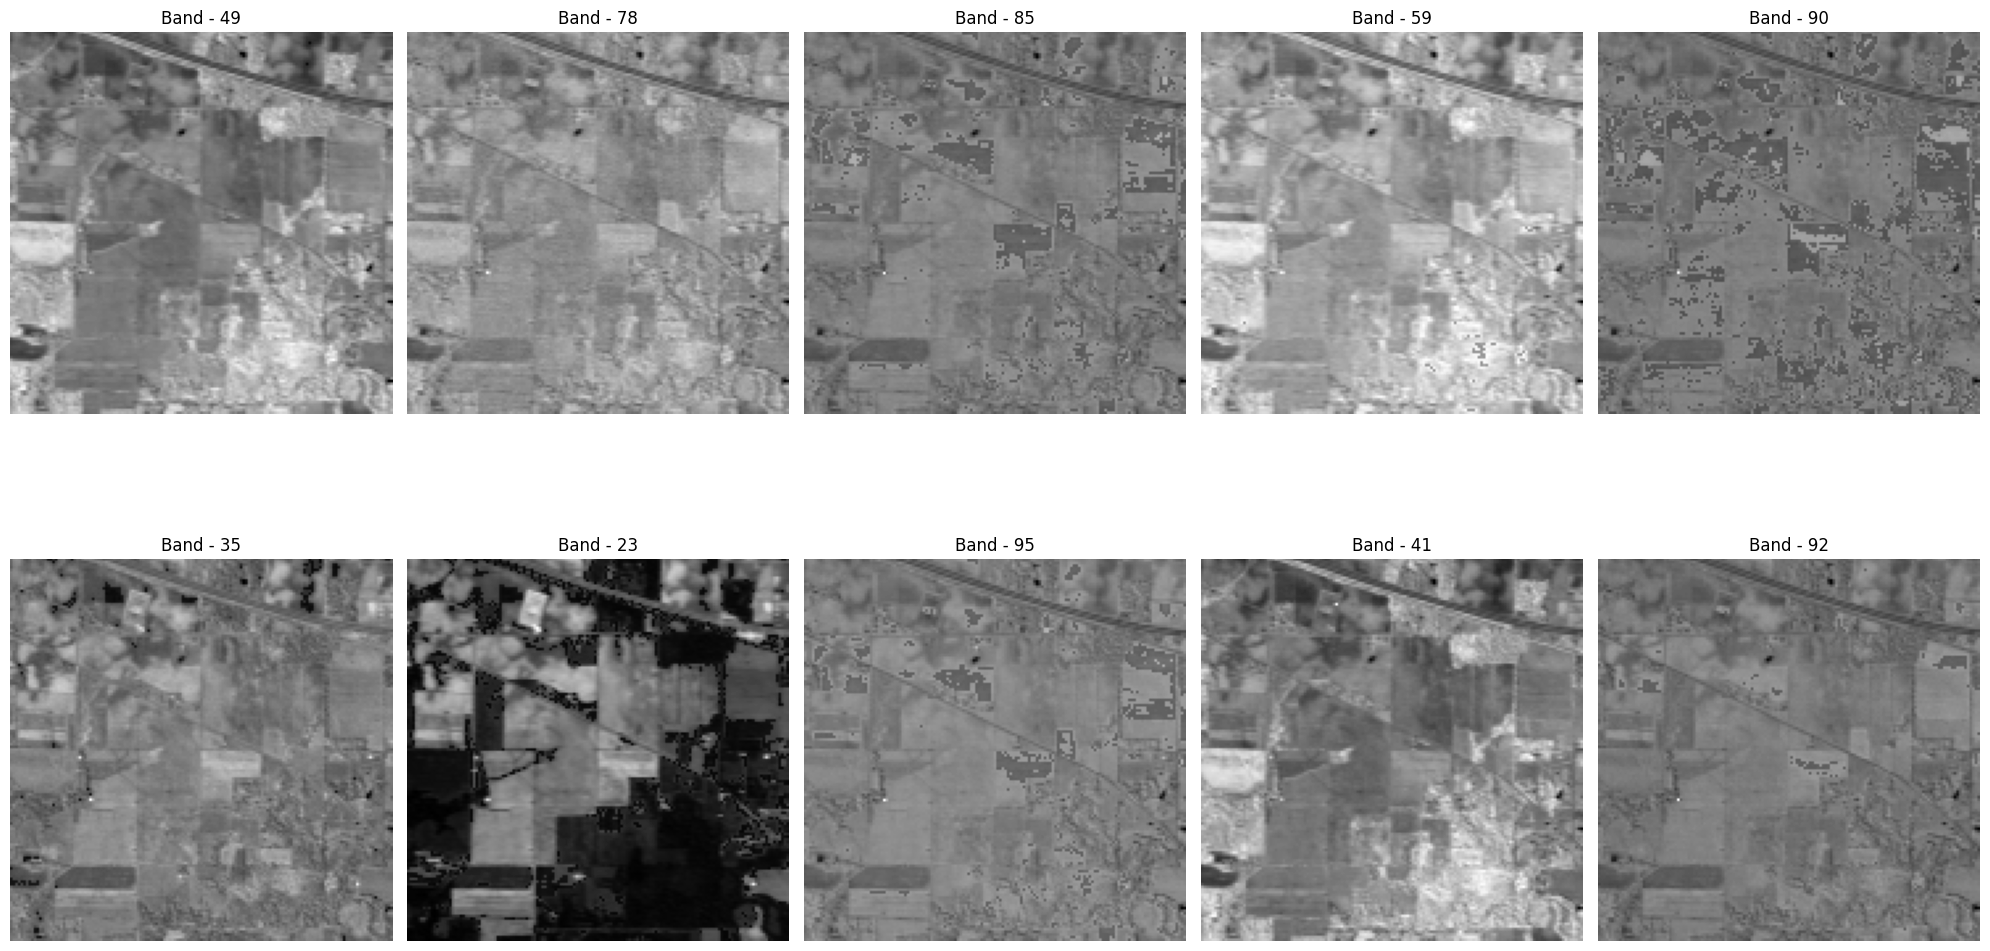

In [ ]:
fig = plt.figure(figsize = (20, 12))

ax = fig.subplots(2, 5)

for i in range(2):
  for j in range(5):
    c = np.random.randint(103)
    ax[i][j].imshow(data[:, :, c], cmap='gray')
    ax[i][j].axis('off')
    ax[i][j].title.set_text(f"Band - {c}")
    c+=1

plt.tight_layout()

plt.show()

# RGB Composite image




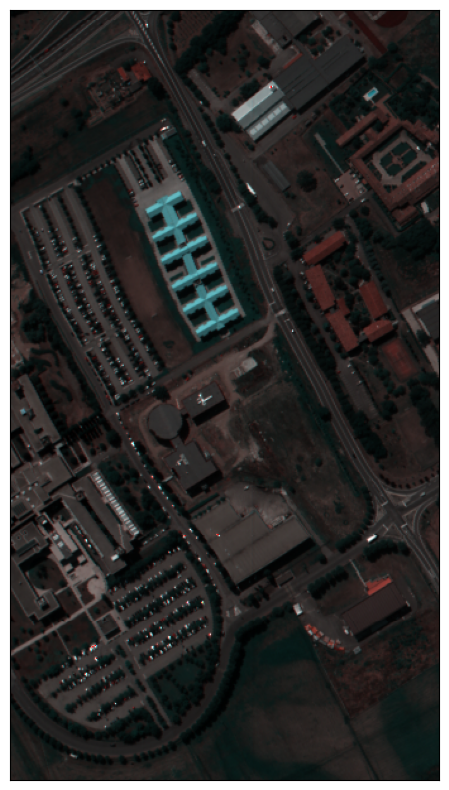

In [ ]:
mdata = np.moveaxis(data, -1, 0)

ep.plot_rgb(mdata, (60, 30, 27), figsize=(12, 10)) 

plt.show()

# Groundtruth
ground truth of the Pavia university HSI, the black color represents the pixels with no information which will be discarded during the classification process

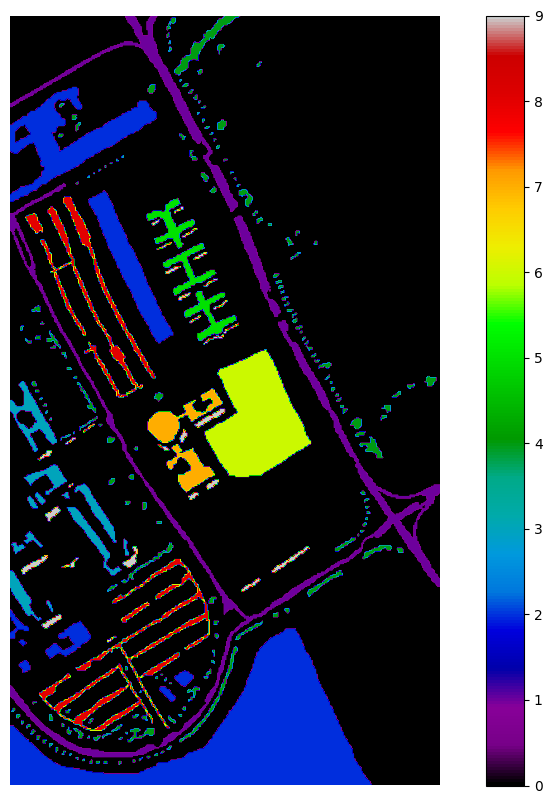

In [ ]:
def plot_data(data):
  fig = plt.figure(figsize=(12, 10))
  plt.imshow(data, cmap='nipy_spectral')
  plt.colorbar()
  plt.axis('off')
  plt.show()

plot_data(gt)

# Implementation of Deep Neural Networks

In [ ]:
X = df[df['class']!=0].iloc[:, :-1].values

y = tf.keras.utils.to_categorical(df[df['class']!=0].iloc[:, -1].values , 
                                  num_classes= np.unique(gt).shape[0], 
                                  dtype='float32') 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, stratify = y)

print(f"Train Data: {X_train.shape}\nTest Data: {X_test.shape}")

Train Data: (29943, 103)
Test Data: (12833, 103)


# Keras to build a Deep neural network (DNN) for land cover classification of the Pavia university HSI

In [ ]:
model = Sequential(name='Pavia_University')

model.add(Input(shape = X_train[0].shape, name = 'Input_Layer'))

model.add(BatchNormalization(name = 'BatchNormalization'))

model.add(Dense(units = 128, activation= 'relu', name = 'Layer1'))
model.add(Dense(units = 128, activation= 'relu', name = 'Layer2'))
model.add(Dense(units = 128, activation= 'relu', name = 'Layer3'))
model.add(Dense(units = 128, activation= 'relu', name = 'Layer4'))

model.add(Dropout(rate = 0.2, name = 'Dropout1',))

model.add(Dense(units = 64, activation= 'relu', name = 'Layer5'))
model.add(Dense(units = 64, activation= 'relu', name = 'Layer6'))
model.add(Dense(units = 64, activation= 'relu', name = 'Layer7'))
model.add(Dense(units = 64, activation= 'relu', name = 'Layer8'))

model.add(Dropout(rate = 0.2, name = 'Dropout2'))

model.add(Dense(units = 32, activation= 'relu', name = 'Layer9'))
model.add(Dense(units = 32, activation= 'relu', name = 'Layer10'))
model.add(Dense(units = 32, activation= 'relu', name = 'Layer11'))
model.add(Dense(units = 32, activation= 'relu', name = 'Layer12'))

model.add(Dense(units = y_train.shape[1], activation= 'softmax', name = 'Output_Layer'))

model.summary()

Model: "Pavia_University"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 BatchNormalization (BatchNo  (None, 103)              412       
 rmalization)                                                    
                                                                 
 Layer1 (Dense)              (None, 128)               13312     
                                                                 
 Layer2 (Dense)              (None, 128)               16512     
                                                                 
 Layer3 (Dense)              (None, 128)               16512     
                                                                 
 Layer4 (Dense)              (None, 128)               16512     
                                                                 
 Dropout1 (Dropout)          (None, 128)               0         
                                                  

# Training Deep Neural Network
For training, Adam optimizer has been used.
Below code has been used for compile and train the model

In [ ]:
# Compile
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Callbacks
es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 15,
                   verbose = 1,
                   restore_best_weights = True)

checkpoint = ModelCheckpoint(filepath = 'Pavia_University_Model.h5', 
                             monitor = 'val_loss', 
                             mode ='min', 
                             save_best_only = True,
                             verbose = 1)
# Fit
history = model.fit(x = X_train, 
          y = y_train,
          validation_data = (X_test, y_test), 
          epochs = 60,
          callbacks = [es, checkpoint])

Epoch 1/60
935/936 [============================>.] - ETA: 0s - loss: 0.5325 - accuracy: 0.7995
Epoch 1: val_loss improved from inf to 0.44964, saving model to Pavia_University_Model.h5
936/936 [==============================] - 20s 14ms/step - loss: 0.5324 - accuracy: 0.7995 - val_loss: 0.4496 - val_accuracy: 0.8304
Epoch 2/60
929/936 [============================>.] - ETA: 0s - loss: 0.4886 - accuracy: 0.8123
Epoch 2: val_loss improved from 0.44964 to 0.37588, saving model to Pavia_University_Model.h5
936/936 [==============================] - 11s 11ms/step - loss: 0.4890 - accuracy: 0.8123 - val_loss: 0.3759 - val_accuracy: 0.8542
Epoch 3/60
935/936 [============================>.] - ETA: 0s - loss: 0.4640 - accuracy: 0.8209
Epoch 3: val_loss improved from 0.37588 to 0.36975, saving model to Pavia_University_Model.h5
936/936 [==============================] - 6s 7ms/step - loss: 0.4638 - accuracy: 0.8210 - val_loss: 0.3698 - val_accuracy: 0.8466
Epoch 4/60
930/936 [=================

# Code for the Accuracy and Loss graph during the training 

In [ ]:
hist = pd.DataFrame(data= history.history)

fig = go.Figure()

fig.add_trace(go.Scatter(x = hist.index, y = hist.loss.values,
                    mode='lines+markers',
                    name='Train Loss'))

fig.add_trace(go.Scatter(x = hist.index, y = hist.accuracy.values,
                    mode='lines+markers',
                    name='Train Accuracy'))

fig.add_trace(go.Scatter(x = hist.index, y = hist.val_loss.values,
                    mode='lines+markers', name='Test loss'))

fig.add_trace(go.Scatter(x = hist.index, y = hist.val_accuracy.values,
                    mode='lines+markers', name='Test Accuracy'))

fig.show()

# Empirical results of the classification model

In [ ]:
# predictions
pred = np.argmax(model.predict(X_test), axis=1)

# Classification Report
print(classification_report(pred, np.argmax(y_test, 1),
      target_names = ['1. Asphalt', '2. Meadows', '3. Gravel', '4. Trees', 
                 '5. Painted metal sheets','6. Bare Soil', '7. Bitumen', 
                 '8. Self-Blocking Bricks', '9. Shadows']))

402/402 [==============================] - 1s 2ms/step
                         precision    recall  f1-score   support

             1. Asphalt       0.95      0.95      0.95      1985
             2. Meadows       0.99      0.96      0.98      5771
              3. Gravel       0.71      0.83      0.76       539
               4. Trees       0.92      0.98      0.95       860
5. Painted metal sheets       1.00      1.00      1.00       403
           6. Bare Soil       0.91      0.97      0.94      1413
             7. Bitumen       0.81      0.91      0.86       359
8. Self-Blocking Bricks       0.90      0.82      0.86      1219
             9. Shadows       1.00      1.00      1.00       284

               accuracy                           0.94     12833
              macro avg       0.91      0.93      0.92     12833
           weighted avg       0.95      0.94      0.94     12833



# confusion matrix
Tabular representation often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known

In [ ]:
plt.figure(figsize = (10,7))

classes = ['Asphalt', 'Meadows', 'Gravel', 'Trees', 'Painted metal sheets',
            'Bare Soil', 'Bitumen', 'Self-Blocking Bricks', 'Shadows']

mat = confusion_matrix(np.add(pred, 1), np.add(np.argmax(y_test, 1), 1))

df_cm = pd.DataFrame(mat, index = classes, columns = classes)

sns.heatmap(df_cm, annot=True, fmt='d')

plt.show()

# Visualization of classification Map

In [ ]:
l = []

for i in tqdm(range(df.shape[0])):
  if df.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(np.argmax(model.predict(df.iloc[i, :-1].values.reshape(-1, 103)), 1))
    
q = np.array(l).reshape(gt.shape).astype('float')

plot_data(q)

NameError: ignored